<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test basic digital modulation functionalities

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [2]:
from optic.comm.modulation import modulateGray, demodulateGray, grayMapping
from optic.comm.metrics import fastBERcalc, theoryBER
from optic.models.channels import awgn
from optic.dsp.core import pnorm, signal_power
from optic.plot import pconst, plotDecisionBoundaries
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

## Define modulation, modulate and demodulate data

BER = 0.00e+00
SNR = 25.00 dB
SNR(est) = 25.01 dB
BER(theory) = 2.32e-07


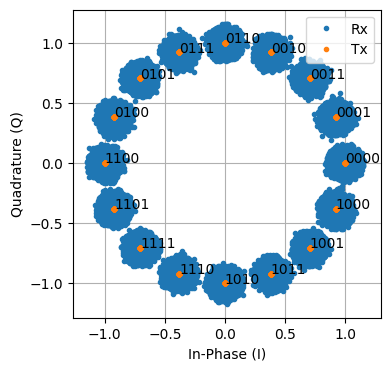

In [22]:
# Run AWGN simulation 
SNRdB = 25 # SNR 
M   = 16  # order of the modulation format
constType = 'psk' # 'qam', 'psk', 'apsk', 'pam' or 'ook'

# generate random bits
bits = np.random.randint(2, size = int(np.log2(M)*1e6))

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# normalize symbols energy to 1
symbTx = pnorm(symbTx)

# AWGN    
EbN0dB = SNRdB - 10*np.log10(np.log2(M))
symbRx = awgn(symbTx, SNRdB)
    
# BER calculation (hard demodulation)
BER, _, SNRest = fastBERcalc(symbRx, symbTx, M, constType)
print('BER = %.2e'%BER[0])
print('SNR = %.2f dB'%SNRdB)
print('SNR(est) = %.2f dB'%SNRest[0])

if constType in ['qam','psk','pam']:
    print('BER(theory) = %.2e'%theoryBER(M, EbN0dB, constType))

plt.figure(figsize=(4,4))
plt.plot(symbRx.real, symbRx.imag,'.', label='Rx')
plt.plot(symbTx.real, symbTx.imag,'.', label='Tx')
plt.axis('square')
plt.xlabel('In-Phase (I)')
plt.ylabel('Quadrature (Q)')
plt.legend(loc='upper right');
plt.grid()


# plot modulation bit-to-symbol mapping
constSymb = grayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))
Es = signal_power(constSymb)                      # mean symbol energy

for ind, symb in enumerate(constSymb/np.sqrt(Es)):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real, symb.imag))

### Plot constellations

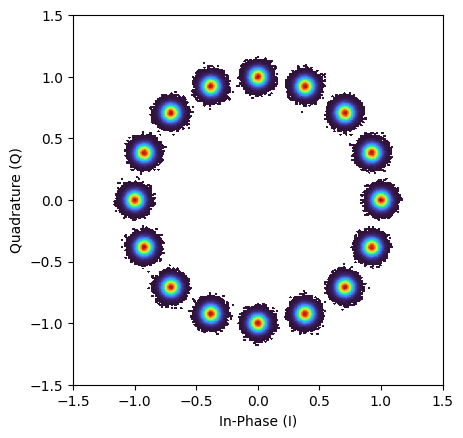

In [16]:
pconst(symbRx, whiteb=True, R=1.5*np.max(np.abs(constSymb/np.sqrt(Es))));

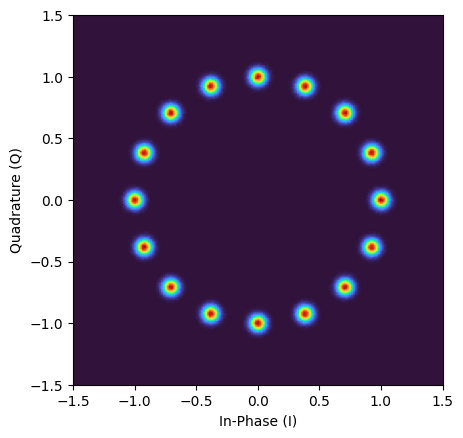

In [17]:
pconst(symbRx, whiteb=False, R=1.5*np.max(np.abs(constSymb/np.sqrt(Es))));

### Plot decision boundaries

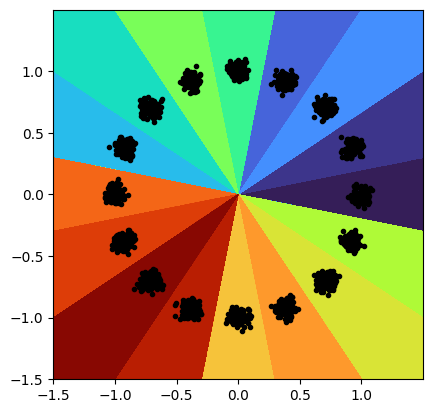

In [23]:
fig, ax = plotDecisionBoundaries(constSymb, gridStep=0.001, d=0.5, cmap=plt.cm.turbo)
ax.plot(symbRx[0:2000].real, symbRx[0:2000].imag,'k.', label='Rx');